**About this file**
**Telecom Churn Datasets**

* Each row represents a customer; each column contains customer’s attributes. The datasets have the following attributes or features:

* State: string
* Account length: integer
* Area code: integer
* International plan: string
* Voice mail plan: string
* Number vmail messages: integer
* Total day minutes: double
* Total day calls: integer
* Total day charge: double
* Total eve minutes: double
* Total eve calls: integer
* Total eve charge: double
* Total night minutes: double
* Total night calls: integer
* Total night charge: double
* Total intl minutes: double
* Total intl calls: integer
* Total intl charge: double
* Customer service calls: integer
* Churn: string

**The "churn-bigml-20" dataset contains 667 rows (customers) and 20 columns (features).**

**The "Churn" column is the target to predict.**

# Import Libraries :

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read Data :

In [188]:
train = pd.read_csv("churn-bigml-80.csv")
test = pd.read_csv("churn-bigml-20.csv")

In [189]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [190]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


# Combine Datasets:

In [191]:
combined = pd.concat([train,test],ignore_index=True)
combined.head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [192]:
combined.shape

(3333, 20)

In [193]:
# See Datatypes of Features Using Info Function:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [194]:
# (.describe) is used to see description of data
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [195]:
combined.Churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

In [252]:
num_cols = combined.select_dtypes(include=np.number).columns
cat_cols = combined.select_dtypes(include="object").columns
print(num_cols)
print(cat_cols)

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')
Index([], dtype='object')


In [197]:
# Change The Datatype of Target Variable to Object bcoz it is given as Boolean 
combined.Churn = combined.Churn.astype("object")

# Visualization :

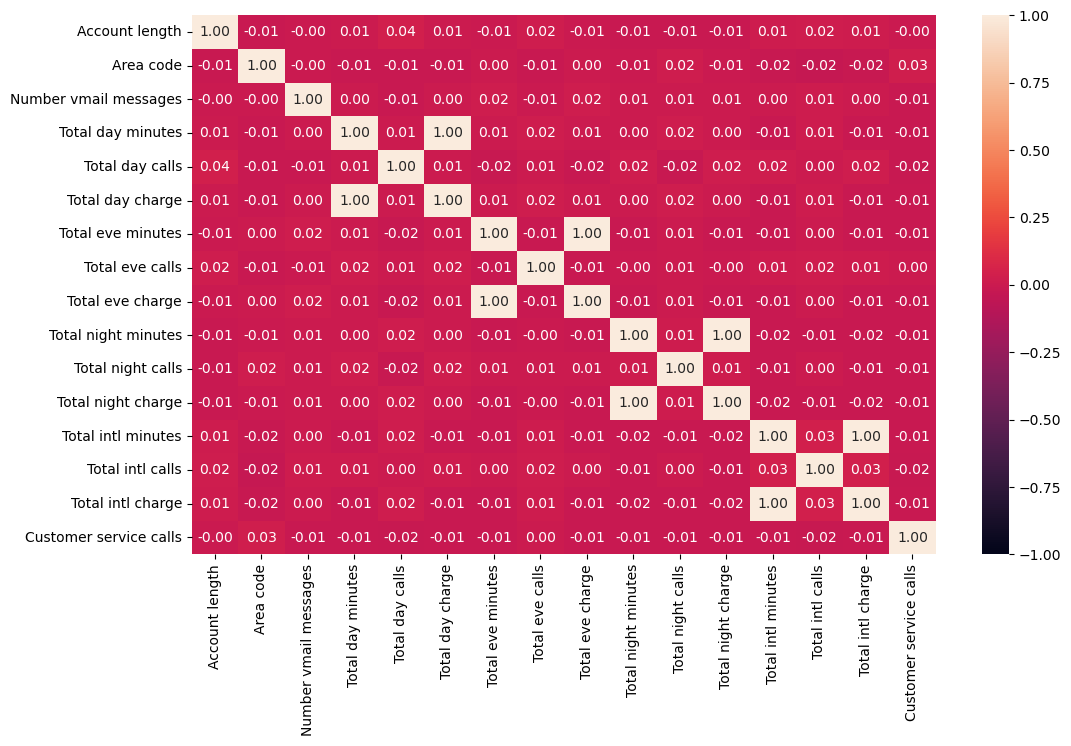

In [198]:
corr = combined.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, fmt='.2f',vmin=-1,vmax=1);

# Univariate Analysis:

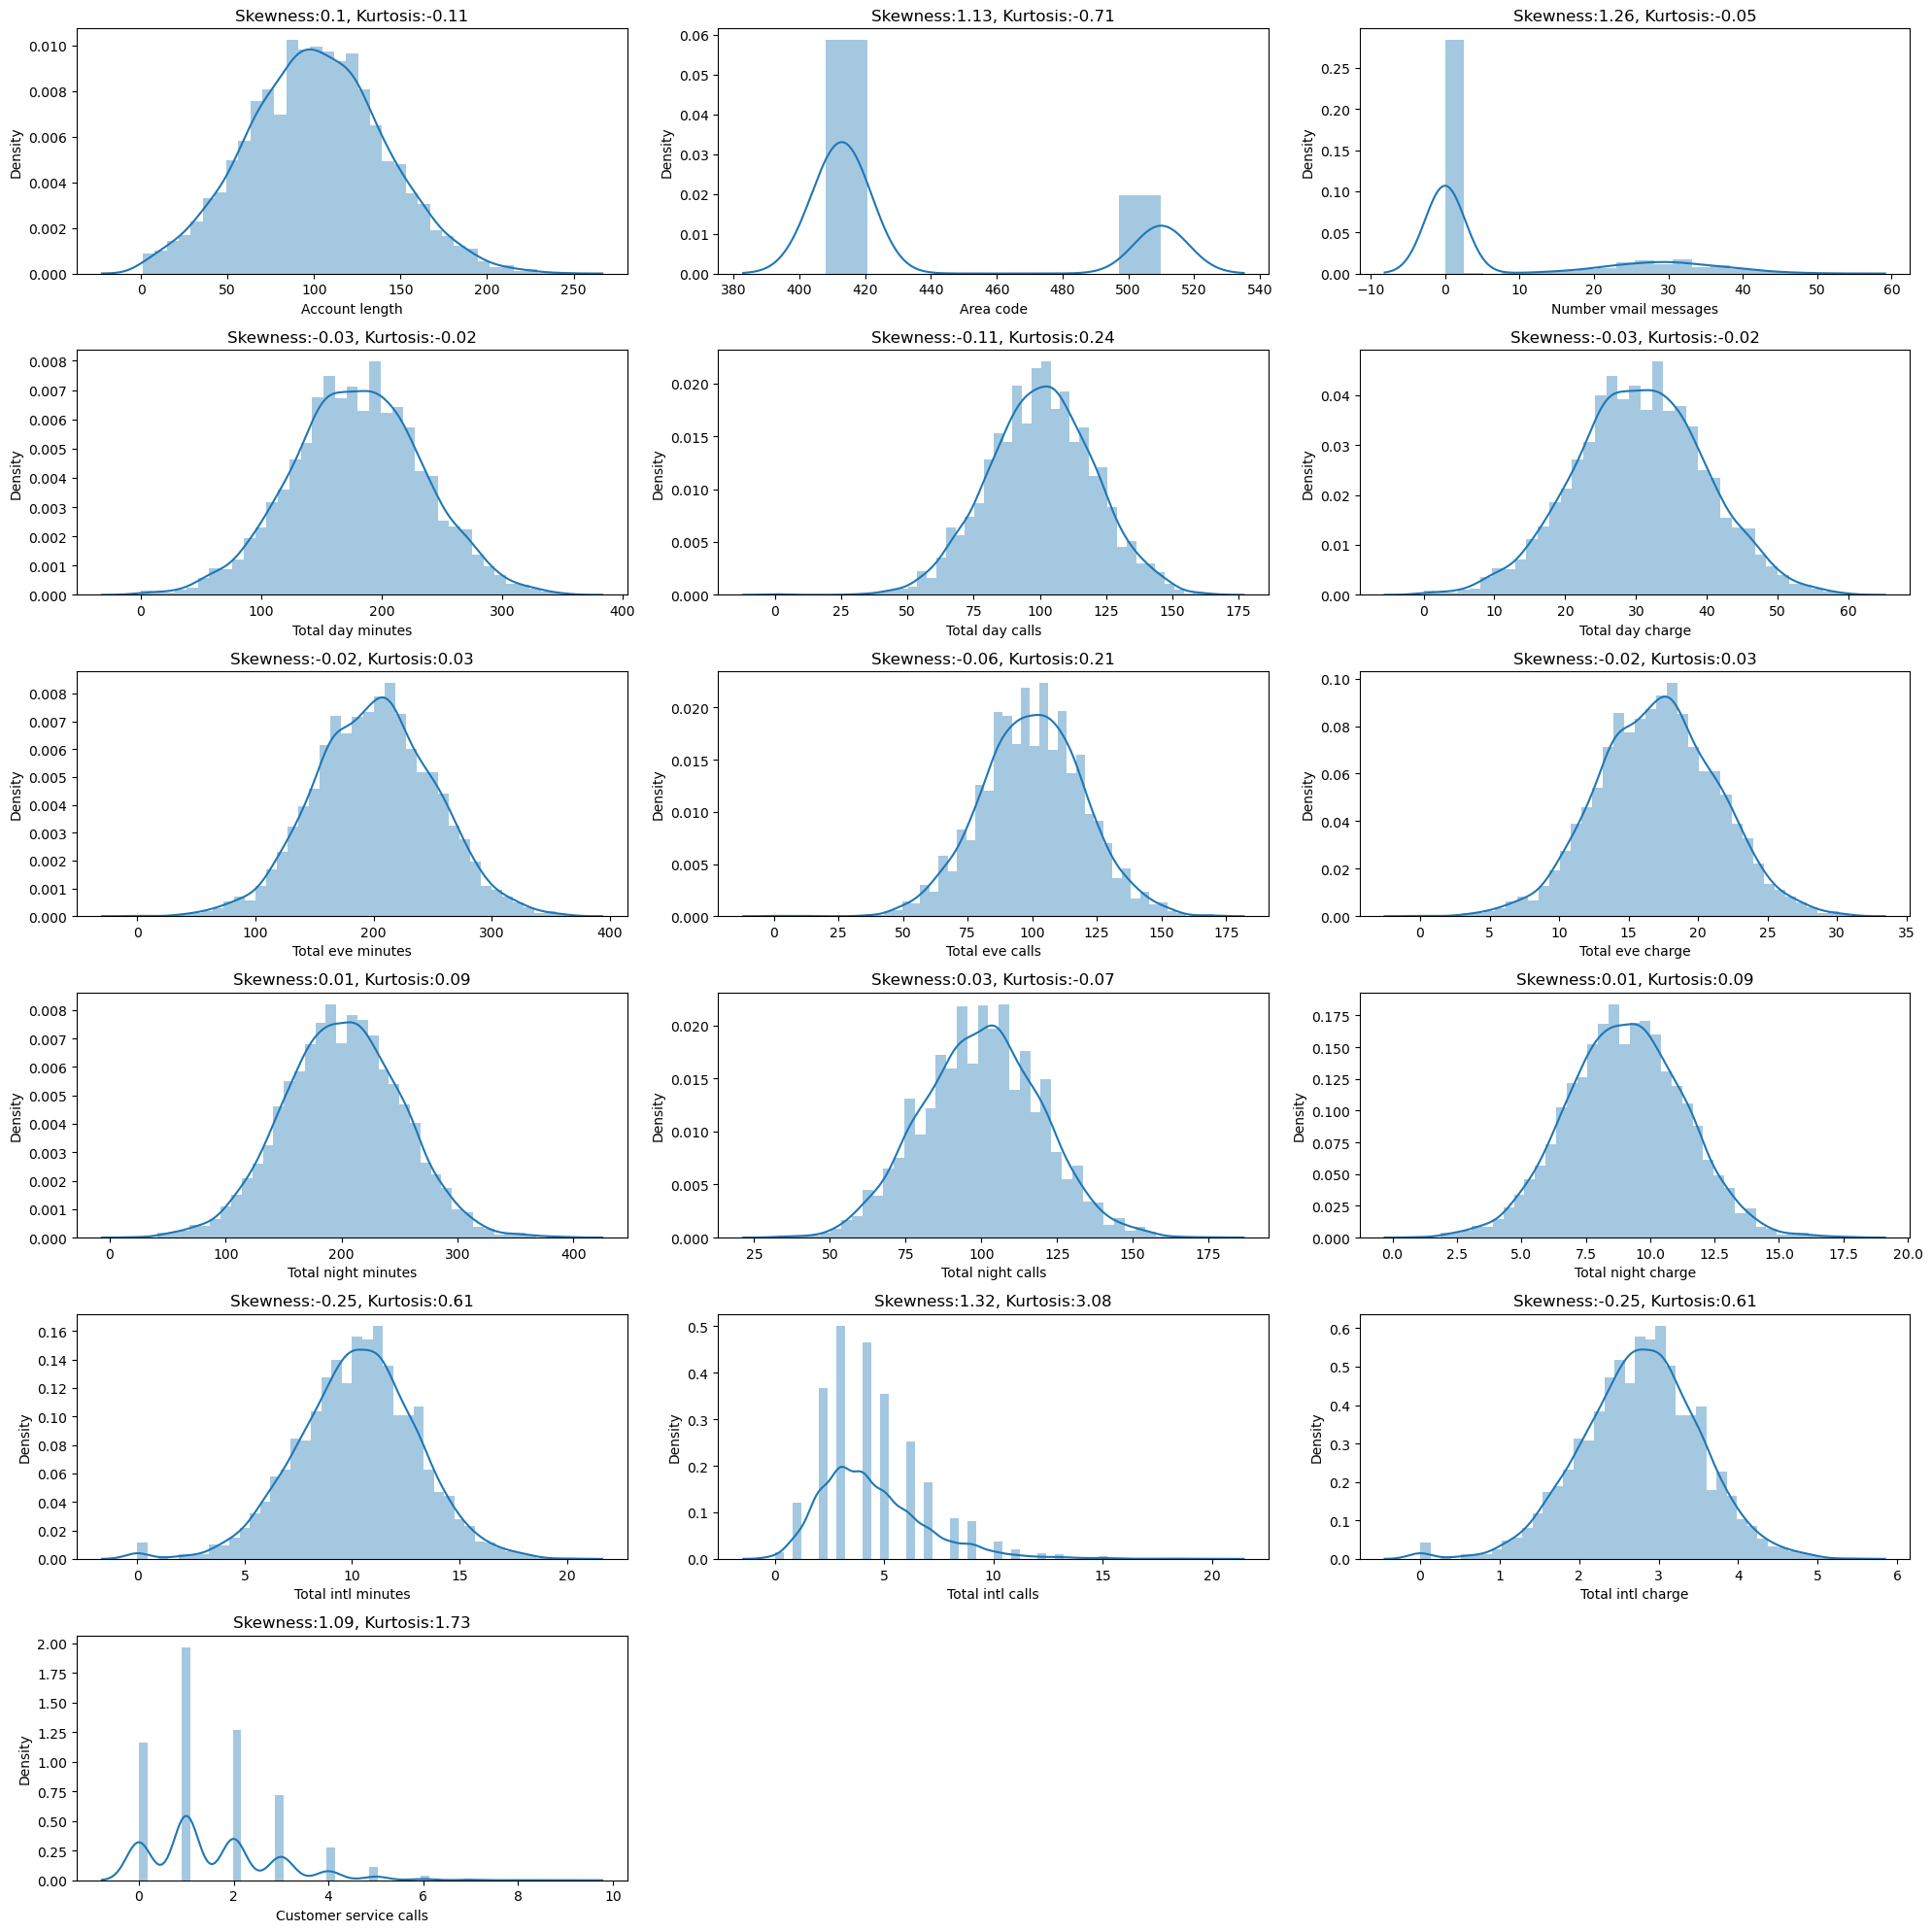

In [199]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(20,20))
t = 1
for i in num_cols:
    plt.subplot(6,3,t)
    sns.distplot(combined[i])
    plt.title(f"Skewness:{combined[i].skew().round(2)}, Kurtosis:{combined[i].kurt().round(2)}")
    t+=1
plt.tight_layout()
plt.show()

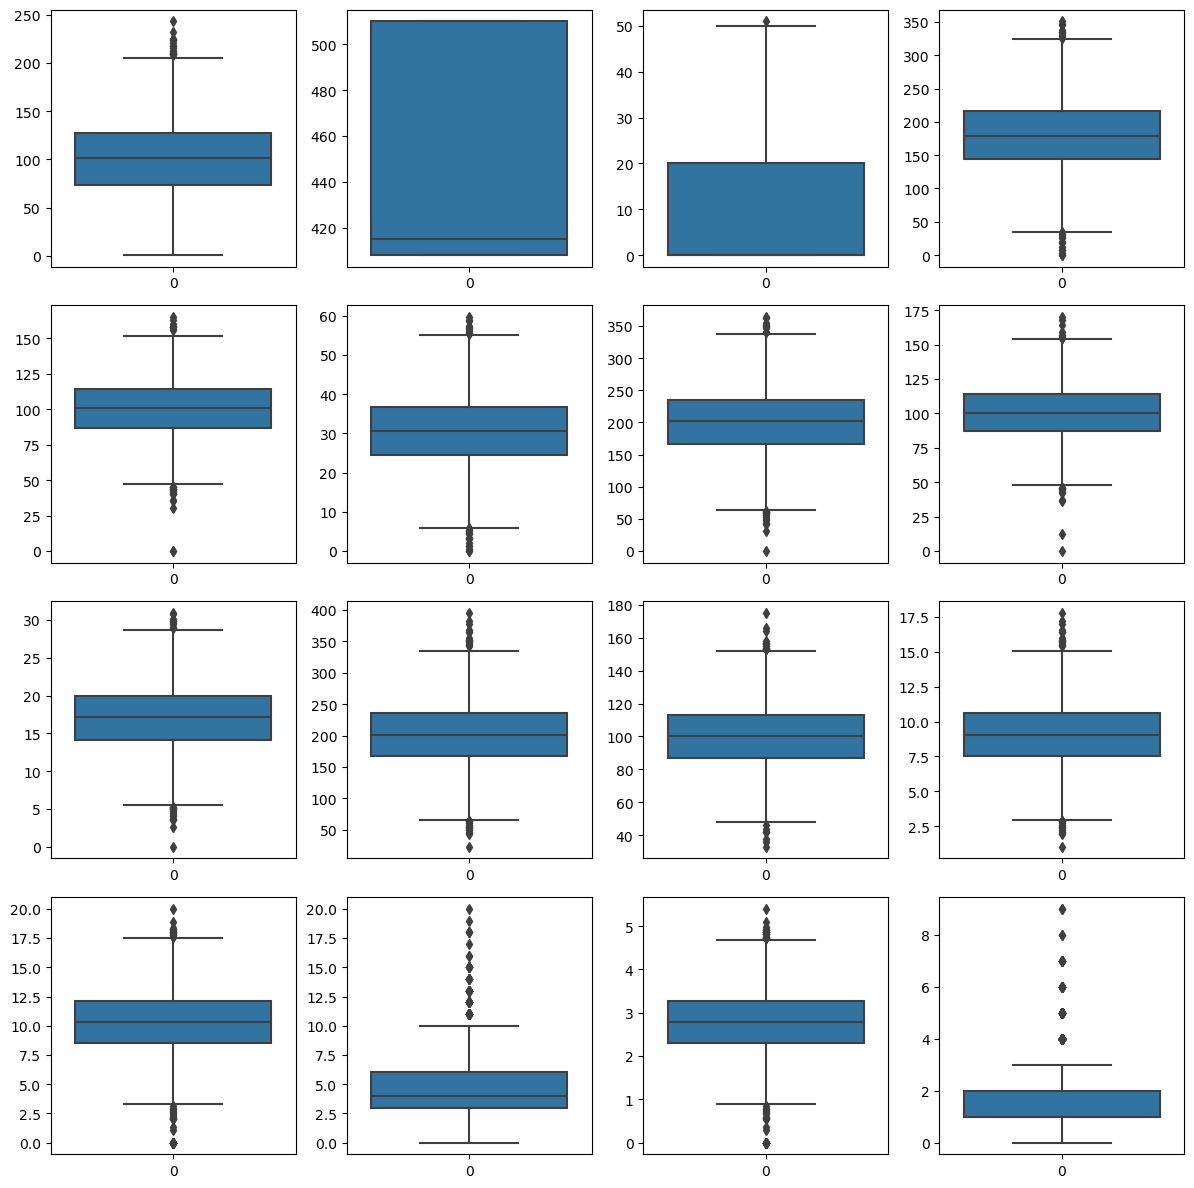

In [200]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(12,12))
t = 1
for i in num_cols:
    plt.subplot(4,4,t)
    sns.boxplot(combined[i])
    t+=1
plt.tight_layout()
plt.show()

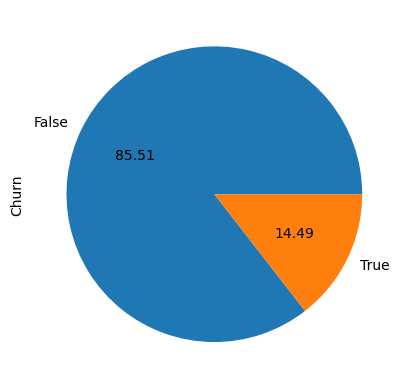

In [201]:
# Pie Plot For Loan Status(Target Variable)
combined["Churn"].value_counts().plot(kind="pie",autopct="%.2f");

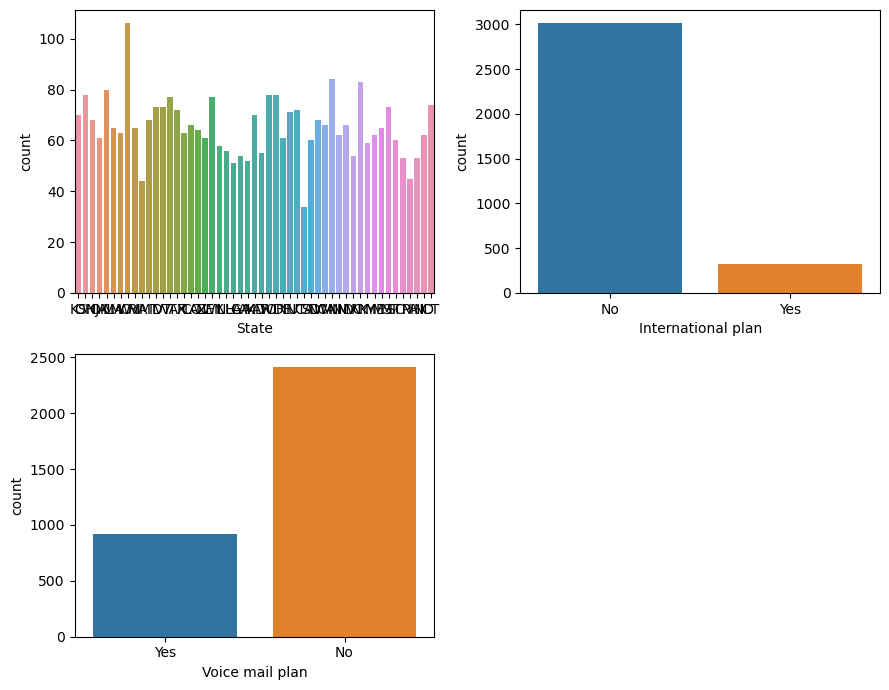

In [202]:
# Univariate Analysis For Categorical Features:
plt.figure(figsize=(9,7))
t = 1
for i in cat_cols:
    plt.subplot(2,2,t)
    sns.countplot(data = combined,x= combined[i])
    t+=1
plt.tight_layout()
plt.show()

# Missing Value TreatMent:

In [203]:
combined.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

# OUTLIERS TREATMENT :

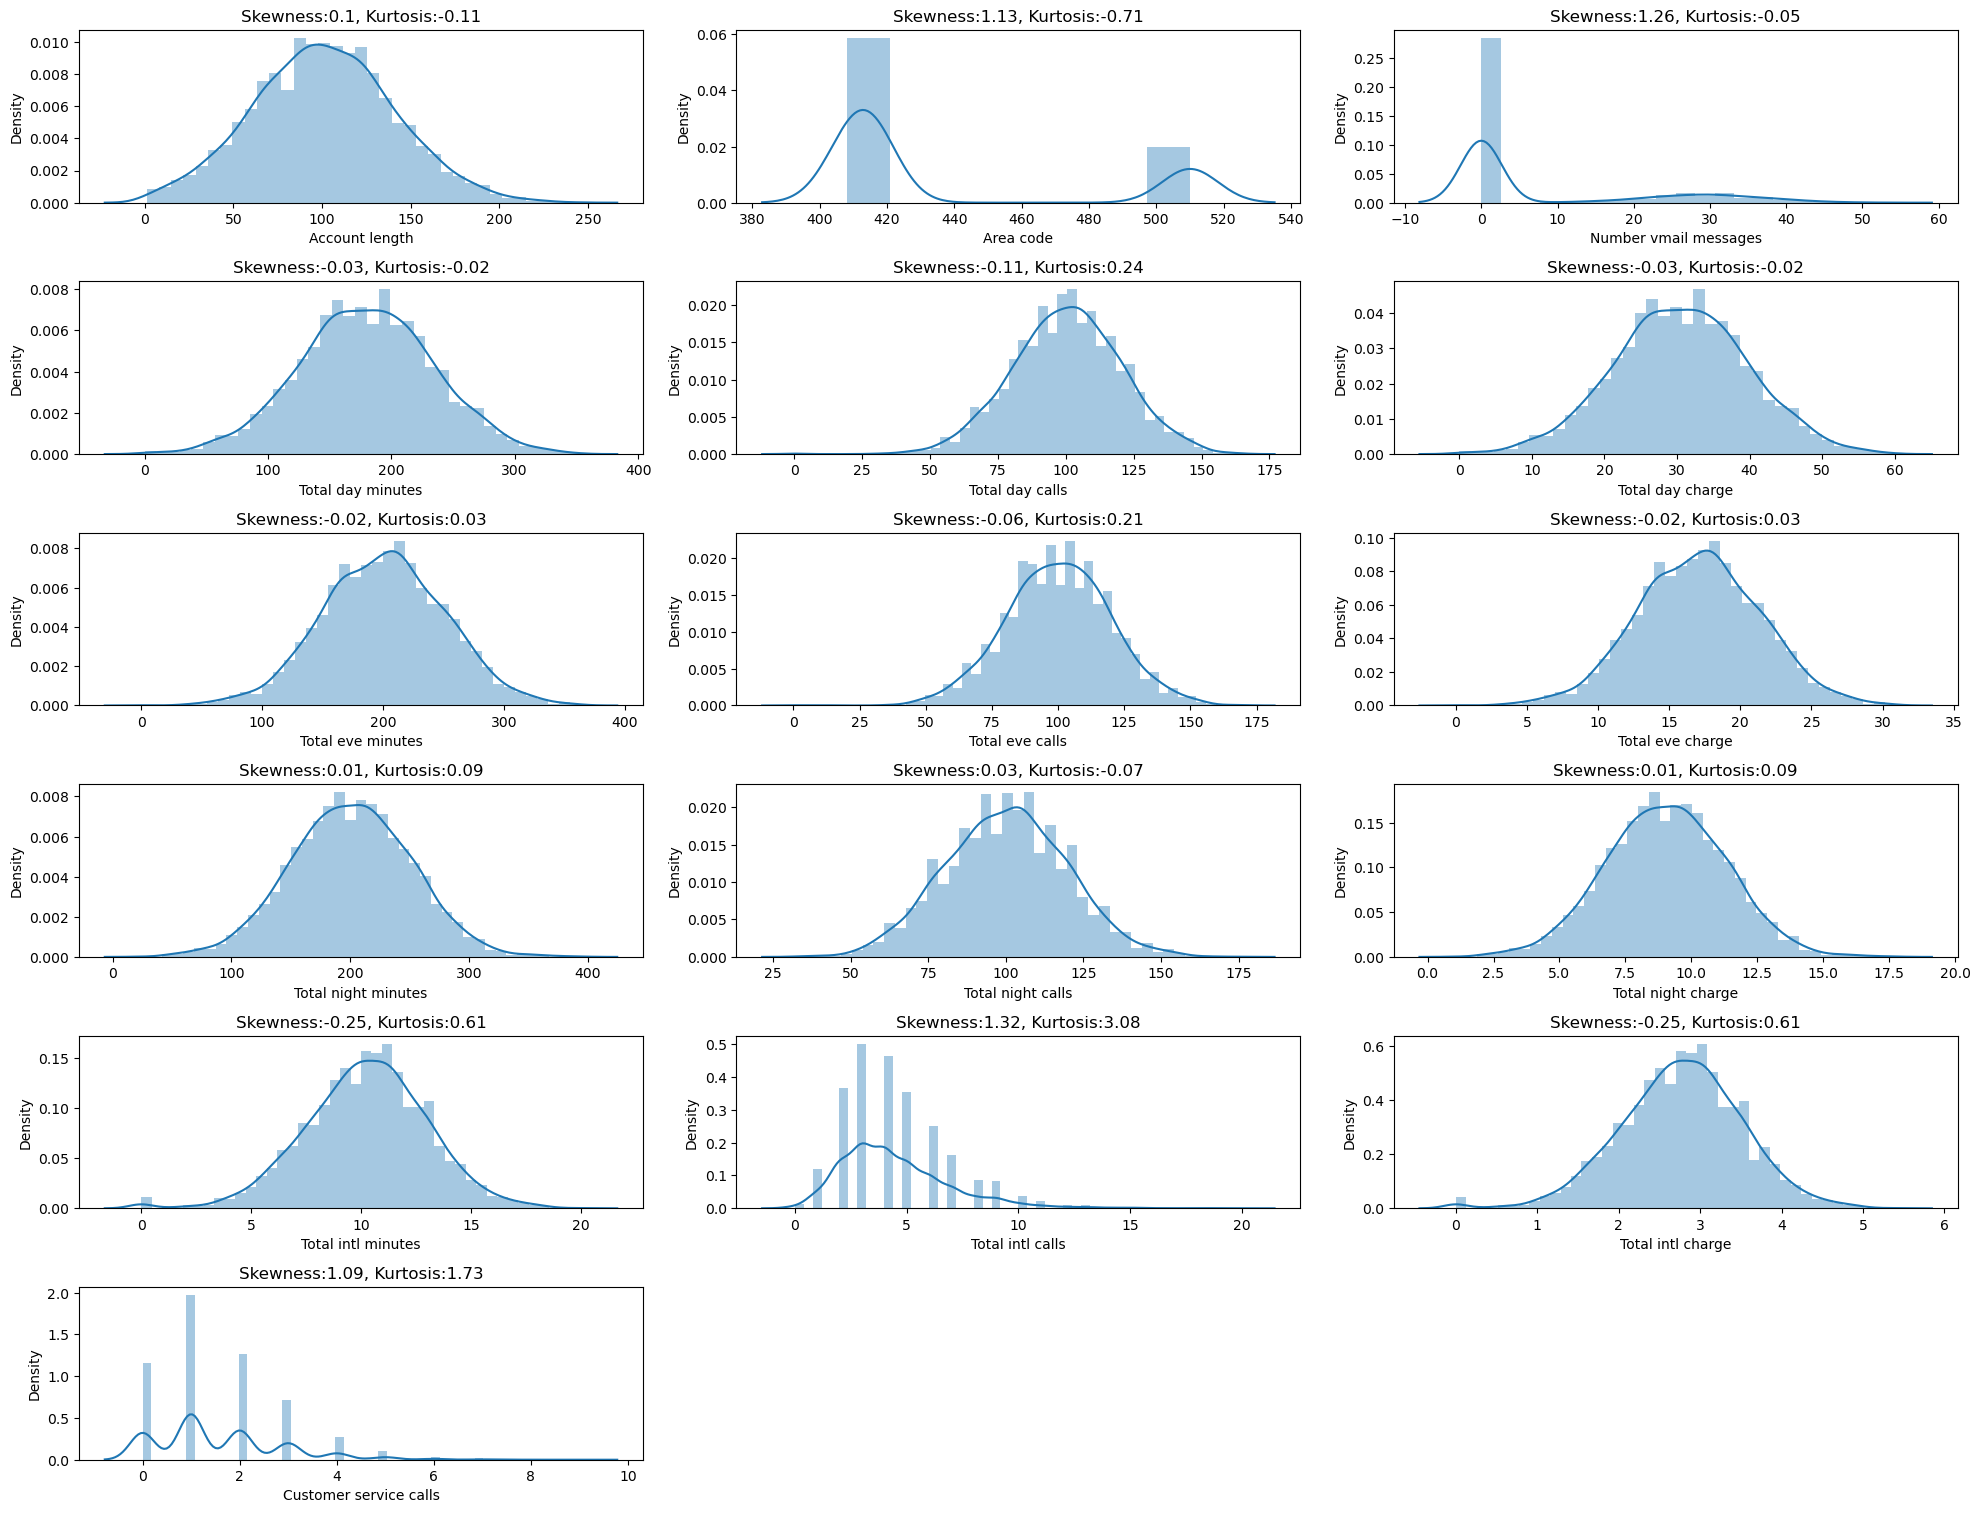

In [204]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(20,50))
t = 1
for i in num_cols:
    plt.subplot(20,3,t)
    sns.distplot(combined[i])
    plt.title(f"Skewness:{combined[i].skew().round(2)}, Kurtosis:{combined[i].kurt().round(2)}")
    t+=1
plt.tight_layout()
plt.show()

# Label Encoding

In [205]:
combined["International plan"] = combined["International plan"].replace({"No":0,"Yes":1})
combined["Voice mail plan"] = combined["Voice mail plan"].replace({"No":0,"Yes":1})
combined["Churn"] = combined["Churn"].replace({False:0,True:1})

In [206]:
del combined["State"]

In [254]:
combined.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Train Test Split :

In [208]:
#train test split 
x = combined.drop('Churn', axis=1)
y = combined['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=42)

In [209]:
print("Shape of X train :",x_train.shape)
print("Shape of X test : ",x_test.shape)
print("Shape of Y train: " ,y_train.shape)
print("Shape of Y test : ",y_test.shape)

Shape of X train : (2666, 18)
Shape of X test :  (667, 18)
Shape of Y train:  (2666,)
Shape of Y test :  (667,)


## Applying Multiple Models:

In [213]:
#Using logistic regression supervised ML classification model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [247]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score
ypred=lr.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8545727136431784
[[562   8]
 [ 89   8]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       570
           1       0.50      0.08      0.14        97

    accuracy                           0.85       667
   macro avg       0.68      0.53      0.53       667
weighted avg       0.81      0.85      0.81       667



In [248]:
# Import Pickle for Making pkl file for Submission:
import pickle

In [249]:
def Model_Validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    y_pred = m.predict(testx)
    print("Accuracy",accuracy_score(testy,y_pred))
    print("confusion matrix:\n",confusion_matrix(testy,y_pred))
    print("Classification report:\n",classification_report(testy,y_pred))
    print("cohen_kappa_score :\n",cohen_kappa_score(testy,y_pred))
    
    
    ans = input("Do you Want to Save this Model y/n?")
    if ans.lower()=="y":
        with open("final_model.pkl","wb") as file:
            pickle.dump(m,file)
        print("Model has been Saved")
    else:
        print("Not Saved")

In [235]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,VotingClassifier
Model_Validation(RandomForestClassifier(n_estimators=200,max_depth=5),x_train,y_train,x_test,y_test)

Accuracy 0.9025487256371814
confusion matrix:
 [[569   1]
 [ 64  33]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       570
           1       0.97      0.34      0.50        97

    accuracy                           0.90       667
   macro avg       0.93      0.67      0.72       667
weighted avg       0.91      0.90      0.88       667

cohen_kappa_score :
 0.46330201408747107


In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [250]:
# GradientBoostingClassifier:
Model_Validation(GradientBoostingClassifier(n_estimators=200,max_depth=5),x_train,y_train,x_test,y_test)

Accuracy 0.9610194902548725
confusion matrix:
 [[566   4]
 [ 22  75]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       570
           1       0.95      0.77      0.85        97

    accuracy                           0.96       667
   macro avg       0.96      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667

cohen_kappa_score :
 0.8300903337056414
Do you Want to Save this Model y/n?y
Model has been Saved


In [233]:
# XGradientBoostingClassifier:
from xgboost import XGBClassifier
Model_Validation(XGBClassifier(n_estimators=150,gamma =2),x_train,y_train,x_test,y_test)

Accuracy 0.9565217391304348
confusion matrix:
 [[568   2]
 [ 27  70]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       570
           1       0.97      0.72      0.83        97

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667

cohen_kappa_score :
 0.8041314363829679


In [241]:
# ADA BOOST
Model_Validation(AdaBoostClassifier(n_estimators=200),x_train,y_train,x_test,y_test)

Accuracy 0.8725637181409296
confusion matrix:
 [[542  28]
 [ 57  40]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       570
           1       0.59      0.41      0.48        97

    accuracy                           0.87       667
   macro avg       0.75      0.68      0.71       667
weighted avg       0.86      0.87      0.86       667

cohen_kappa_score :
 0.41468878725622793


In [255]:
# bagging With Naive Bais:
from sklearn.naive_bayes import GaussianNB
Model_Validation(BaggingClassifier(base_estimator=GaussianNB(),n_estimators=200),x_train,y_train,x_test,y_test)

Accuracy 0.8590704647676162
confusion matrix:
 [[524  46]
 [ 48  49]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       570
           1       0.52      0.51      0.51        97

    accuracy                           0.86       667
   macro avg       0.72      0.71      0.71       667
weighted avg       0.86      0.86      0.86       667

cohen_kappa_score :
 0.4281153656712334
Do you Want to Save this Model y/n?
Not Saved


# Thank You..